In [68]:
#### get top 5 repos for keyword ###
import requests

keyword = "finance" #change this to what you want to search for
headers = {"Authorization": "token "}


def run_query(query): # A simple function to use requests.post to make the API call. Note the json= section.
    request = requests.post('https://api.github.com/graphql', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))

        
# The GraphQL query (with a few aditional bits included) itself defined as a multi-line string.       
query = """
 {
  search(query: \"topic:%s\", type: REPOSITORY, first: 5) {
    edges {
      node {
        ... on Repository {
          nameWithOwner
        }
      }
    }
  }
}
"""

result = run_query(query % keyword) # Execute the query

repos = []
for node in result["data"]["search"]["edges"]:
    repos.append(node["node"]["nameWithOwner"])

print(repos)
    

['plotly/dash', 'vnpy/vnpy', 'waditu/tushare', 'firefly-iii/firefly-iii', 'wilsonfreitas/awesome-quant']


In [69]:
from pydriller import RepositoryMining
from datetime import datetime
import time
import pandas as pd


now = datetime.now() 
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)
repo_stats = []
for repo in repos:
    url = "https://github.com/" + repo + ".git"

    commit_months = []
    emails = []
    for commit in RepositoryMining(path_to_repo=url).traverse_commits():
        commit_months.append("%s-%s" % (commit.author_date.year,str(commit.author_date.month).zfill(2)))
        emails.append(commit.author.email)

    df = pd.DataFrame({'commit_month': commit_months, 'email': emails})
    repo_stats.append(df.sort_values('commit_month').groupby('commit_month')['email'].nunique())

now = datetime.now() 
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 05/12/2020 15:38:37
date and time = 05/12/2020 15:47:22


Min contrib: 1.0
Mean contrib: 3.5605730151971153
Max contrib: 9.2


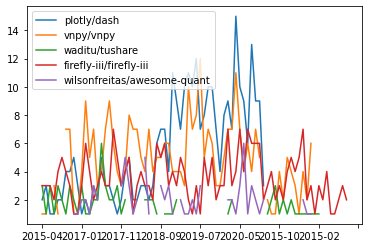

In [133]:
chartdf = pd.DataFrame()
i=0
for repo in repo_stats:
    repo.name = repos[i]
    chartdf = pd.concat([chartdf, repo],axis=1)
    i +=1
    
chartdf.plot()

print("Min contrib:", chartdf.min().mean())
print("Mean contrib:",chartdf.mean().mean())
print("Max contrib:", chartdf.max().mean())

